# Análisis de datos de restaurantes en LA

## Introducción

El presente proyecto tiene como objeto el análisis de datos de restaurantes en la ciudad de Los Ángeles, con el objeto de evaluar la rentabilidad de una innovadora propuesta de restaurant, atendido mediante robots, a ser implementado en un café.  
Se cuenta con datos procedentes de fuentes abiertas sobre restaurantes en LA para la realización del análisis.

## 1. Preprocesamiento de datos

### 1.1 Importación de librerías y dataset

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

Primeramente, se realizará la carga del dataset, así como la visulización general del mismo, a fin de verificar los tipos de dato de cada columna, y corroborar que sean los tipos correctos o más adecuados. De no serlos, se procederá a cambiar el tipo de datos para optimizar el dataset.

In [45]:
#Importo dataset y visualizo la información general del mismo
df_rest = pd.read_csv('./dataset/rest_data_us_upd.csv')
print(df_rest.info())
print()
df_rest.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB
None



,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [46]:
#Verifico que los únicos datos en la columna 'chain' sean True or False
df_rest['chain'].unique()

array([False, True, nan], dtype=object)

In [47]:
#Convierto los datos de la columna 'chain' al tipo booleano
df_rest['chain'] = df_rest['chain'].astype(bool)
df_rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9651 non-null   bool  
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: bool(1), int64(2), object(3)
memory usage: 386.5+ KB


### 1.2 Preparación de los datos

Se define una función para detectar errores tales como valores ausentes ó valores duplicados. La función también evalúa el formato de nombres de las columnas, llevándolos todos a la convención snake_case.

In [48]:
def error_detection(df): #Función para detectar errores en dataset y convertir todos los títulos de columnas en convención snake_case
    #Detección de valores ausentes por columna:
    for column in df:
        print(f'Valores ausentes en columna {column}:', df[column].isna().sum())
    print()
    #Detección de filas duplicadas:
    print('Cantidad de filas duplicadas:', df.duplicated().sum())
    print()
    #Cambiar formato erróneo en nombres de columnas:
    new_col_name = {}
    for column in df:
        new_col_name[column]= column.strip().lower().replace(' ', '_')
    df.rename(columns=new_col_name, inplace=True)
    return df

In [49]:
#Aplico la función al dataset
error_detection(df_rest)

Valores ausentes en columna id: 0
Valores ausentes en columna object_name: 0
Valores ausentes en columna address: 0
Valores ausentes en columna chain: 0
Valores ausentes en columna object_type: 0
Valores ausentes en columna number: 0

Cantidad de filas duplicadas: 0



,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6


In [50]:
#Evalúo posibles duplicados en 'id'
print('Duplicados en la columna "id":', df_rest['id'].duplicated().sum())

Duplicados en la columna "id": 0


En forma general, no se detectan valores ausentes ni filas duplicadas.  
Tampoco se presentan duplicados en la columna 'id', lo cual indica que no hay registros en duplicado.

## 2. Análisis de datos

### 2.1 Proporciones de los establecimientos

Se investigará a continuación las proporciones de los distintos tipos de establecimientos.

In [51]:
df_rest.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


,object_type,quantity,ratio
0,Bakery,283,0.029323
1,Bar,292,0.030256
2,Cafe,435,0.045073
3,Fast Food,1066,0.110455
4,Pizza,320,0.033157
5,Restaurant,7255,0.751736


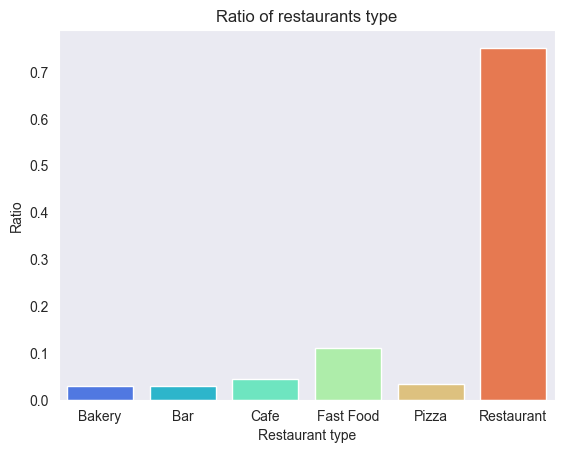

In [52]:
rest_type = df_rest.groupby('object_type')['id'].count().reset_index()
rest_type.columns = ['object_type', 'quantity']
rest_type['ratio'] = rest_type['quantity'] / rest_type['quantity'].sum()
display(rest_type)
ax = sns.barplot(x='object_type', y='ratio', data=rest_type, palette='rainbow', hue='object_type', legend=False)
plt.title('Ratio of restaurants type')
plt.xlabel('Restaurant type')
plt.ylabel('Ratio')
sns.set_style('dark')

Al analizar las proporciones, se detecta que más del 75% son restaurantes.

### 2.2 Proporciones de establecimientos que pertenecen a cadena

Para analizar las proporciones de los diferentes establecimientos que pertenecen a una cadena o no, se abordará desde dos puntos de vista:  
* La proporción dentro de cada tipo de establecimiento, es decir, qué porcentaje de su total pertenece a una cadena o no.  
* La proporción respecto a la distribución por tipo de establecimiento, es decir, qué porcentaje de la distribución general vista en el apartado anterior pertenece a una cadena o no.

Para el primer punto de vista, se arma un dataframe con los valores totales de establecimientos por tipo y por cadena, a fin de calcular la proporción.

In [53]:
rest_type_chain = df_rest.groupby(['object_type', 'chain'])['id'].count().reset_index()
rest_type_chain

,object_type,chain,id
0,Bakery,True,283
1,Bar,False,215
2,Bar,True,77
3,Cafe,False,169
4,Cafe,True,266
5,Fast Food,False,461
6,Fast Food,True,605
7,Pizza,False,166
8,Pizza,True,154
9,Restaurant,False,4961


In [54]:
rest_type_chain_ratio = rest_type_chain.merge(rest_type, on='object_type', how='left')
rest_type_chain_ratio.columns = ['object_type', 'chain', 'quantity', 'total_by_type', 'ratio']
rest_type_chain_ratio['ratio'] = rest_type_chain_ratio['quantity'] / rest_type_chain_ratio['total_by_type']
rest_type_chain_ratio

,object_type,chain,quantity,total_by_type,ratio
0,Bakery,True,283,283,1.000000
1,Bar,False,215,292,0.736301
2,Bar,True,77,292,0.263699
3,Cafe,False,169,435,0.388506
4,Cafe,True,266,435,0.611494
5,Fast Food,False,461,1066,0.432458
6,Fast Food,True,605,1066,0.567542
7,Pizza,False,166,320,0.518750
8,Pizza,True,154,320,0.481250
9,Restaurant,False,4961,7255,0.683804


In [55]:
fig = px.bar(rest_type_chain_ratio, x='object_type', y='ratio', color='chain', title='chain')
fig.update_layout(
    title_text='Restaurant by type and chain',
    xaxis_title_text='Restaurant type',
    yaxis_title_text='Ratio',
)
fig.show()

Se observa que para los restaurantes y bares, predominan los establecimientos que no pertenecen a una cadena, mientras que para los café, fast food y Bakery predominan los que pertenecen a cadenas. Para el caso de las pizzerías se distribuyen casi en 50% en uno y otro.

A continuación evaluamos el segundo punto de vista, desde la distribución general según tipo de establecimiento:

In [56]:
fig = px.histogram(df_rest, x='object_type', color='chain')
fig.update_layout(
    title_text='Restaurant by type and chain',
    xaxis_title_text='Restaurant type',
    yaxis_title_text='Count',
)
fig.show()

Según se observa en el diagrama anterior, es mayor la cantidad de establecimientos que no pertenecen a una cadena de los que sí, ya que aquellos en donde predominan las cadenas, tienen una baja cantidad de establecimientos.

### 2.3 Tipo de establecimiento que habitualmente es cadena

Según el análisis previo, el tipo de establecimiento que es solamente cadena es el **Bakery**.

### 2.4 Características típicas de las cadenas

Se busca comprender qué caracteriza a las cadenas: muchos establecimientos con un pequeño número de asientos o unos pocos establecimientos con muchos asientos.  
Para esto, primeramente se analizará en forma general todos aquellos establecimientos que son parte de una cadena, aplicando el método describe() para la columna de cantidad de asientos, y encontrando posteriormente la distribución de la cantidad de asientos en función del tipo de establecimiento.  

En segundo lugar, se hará lo mismo para los que no pertencen a una cadena, a fin de compararlos.  

Por último, se evaluará la distribución específicamente para los establecimientos del tipo "Café".

count    3679.000000
mean       39.675455
std        43.426312
min         1.000000
25%        13.000000
50%        25.000000
75%        44.000000
max       229.000000
Name: number, dtype: float64

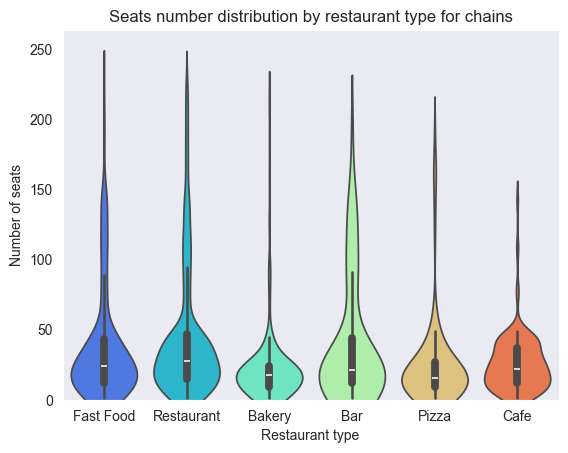

In [57]:
display(df_rest.query('chain == True')['number'].describe())
sns.violinplot(x="object_type", y="number", data=df_rest.query('chain == True'), palette='rainbow', hue='object_type', legend=False)
plt.title('Seats number distribution by restaurant type for chains')
plt.xlabel('Restaurant type')
plt.ylabel('Number of seats')
plt.ylim(0, None)
sns.set_style('dark')

count    5972.000000
mean       46.171467
std        49.875746
min         1.000000
25%        14.000000
50%        28.000000
75%        47.000000
max       229.000000
Name: number, dtype: float64

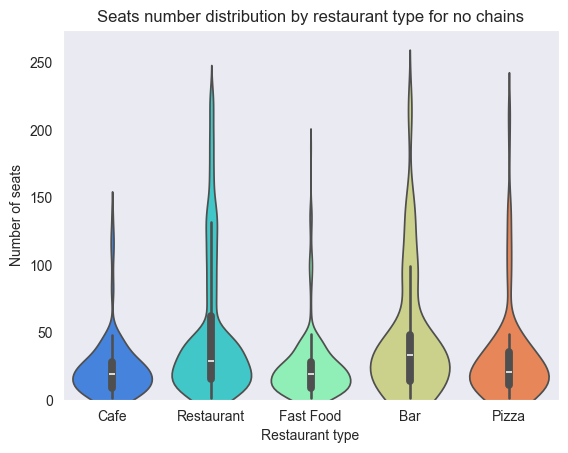

In [58]:
display(df_rest.query('chain == False')['number'].describe())
sns.violinplot(x="object_type", y="number", data=df_rest.query('chain == False'), palette='rainbow', hue='object_type', legend=False)
plt.title('Seats number distribution by restaurant type for no chains')
plt.xlabel('Restaurant type')
plt.ylabel('Number of seats')
plt.ylim(0, None)
sns.set_style('dark')

Se estudiará a continuación la distribución específicamente para los establecimientos de café que pertenecen a una cadena:

count    266.000000
mean      25.917293
std       20.334391
min        1.000000
25%       12.000000
50%       22.000000
75%       36.750000
max      143.000000
Name: number, dtype: float64

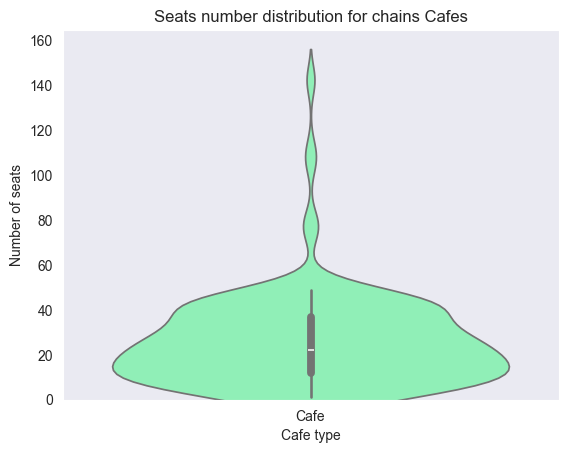

In [59]:
display(df_rest.query('(chain == True)&(object_type == "Cafe")')['number'].describe())
sns.violinplot(x="object_type", y="number", data=df_rest.query('(chain == True)&(object_type == "Cafe")'), palette='rainbow', hue='object_type', legend=False)
plt.title('Seats number distribution for chains Cafes')
plt.xlabel('Cafe type')
plt.ylabel('Number of seats')
plt.ylim(0, None)
sns.set_style('dark')

Conclusiones:  
* Se observa que la mayoría de los establecimientos que pertenecen a una cadena poseen entre 10 y 50 asientos.  
* Solamente en los establecimientos de cadena que son del tipo "bar" se observa una mayor variabilidad de casos con menor y mayor cantidad de asientos.  
* Comparando con los establecimientos que no pertenecen a una cadena:  
    * se observa que en general la distribución de asientos no depende del ser parte o no de una cadena, sino más bien del tipo de restaurant, ya que en ambos casos las distribuciones son similares para cada tipo.  
    * Se observa también aquí que la cantidad de establecimientos de cadena es menor que los que no pertenecen a una.  
    * Para el caso del tipo "restaurant", se observa que aquellos que pertenecen a una cadena tienen, en general, menor cantidad de asientos que aquellos que no son parte de una.

### 2.5 Promedio de número de asientos para cada tipo de restaurante

A continuación, se analiza la cantidad media de asientos por tipo de establecimiento, considerando también la cantidad de establecimientos de cada tipo.

In [60]:
restaurant_types = df_rest.groupby('object_type').agg({'object_name':'nunique', 'number':'mean'}).sort_values(by='number', ascending=False).reset_index()
restaurant_types.columns = ['object_type', 'quantity', 'seat_avg']
restaurant_types

,object_type,quantity,seat_avg
0,Restaurant,6667,48.042316
1,Bar,275,44.767123
2,Fast Food,872,31.837711
3,Pizza,263,28.459375
4,Cafe,344,25.000000
5,Bakery,255,21.773852


In [61]:
fig = px.bar(restaurant_types, x='object_type', y='seat_avg', color='quantity')
fig.update_layout(
    title_text="Restaurants by type and seats",
    xaxis_title_text='Restaurant type',
    yaxis_title_text="Average of seats number",
)
fig.show()

Conclusiones:  
* Se observa que la cantidad media de asientos en los establecimientos varían entre 21 y 48.  
* Los establecimientos con mayor cantidad de asientos se presentan en el tipo Restaurant. A la vez, este tipo posee la mayor cantidad de establecimientos.  
* Los Bakery son los establecimientos que tienen, en promedio, la menor cantidad de asientos.
* Los Café presentan una media de 25 asientos.

### 2.6 Datos de calles de establecimientos

Se extraerá de la columna 'adress' el nombre de la calle donde su ubica cada establecimiento, almacenándose la misma en una nueva columna del dataframe.  
Para esto, se utilizarán expresiones regulares que comprendan todas las posibilidades, y el método extract().

In [62]:
df_rest.head(10)

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
5,11791,THE SPOT GRILL,10004 NATIONAL BLVD,False,Restaurant,14
6,11792,CPK,100 WORLD WAY 126,False,Restaurant,100
7,11793,PHO LALA,3500 W 6TH ST STE 226,False,Restaurant,7
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
9,11795,UPSTAIRS,3707 N CAHUENGA BLVD,False,Restaurant,35


In [63]:
df_rest['street'] = df_rest['address'].str.extract(r'([^\d]\d[a-zA-Z ]+)').fillna(df_rest['address'].str.extract(r'([a-zA-Z ]+)'))
df_rest.head(10)

,id,object_name,address,chain,object_type,number,street
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9,WORLD WAY
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20,HOLLYWOOD BLVD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK AVE
5,11791,THE SPOT GRILL,10004 NATIONAL BLVD,False,Restaurant,14,NATIONAL BLVD
6,11792,CPK,100 WORLD WAY 126,False,Restaurant,100,WORLD WAY
7,11793,PHO LALA,3500 W 6TH ST STE 226,False,Restaurant,7,6TH ST STE
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1,N SAN FERNANDO RD UNIT
9,11795,UPSTAIRS,3707 N CAHUENGA BLVD,False,Restaurant,35,N CAHUENGA BLVD


### 2.7 Las 10 mejores calles por cantidad de establecimientos

Se evaluará a continuación cuáles son las 10 mejores calles en función de la cantidad de establecimientos.  
Para esto, primeramente se agrupará por calle, contando la cantidad de establecimientos, y luego se representará la distribución de establecimientos para dichas calles.

In [64]:
ten_best_street = df_rest.groupby('street')['id'].count().sort_values(ascending=False)[:10].reset_index()
ten_best_street.columns = ['street', 'rest_quantity']
ten_best_street

,street,rest_quantity
0,W SUNSET BLVD,296
1,W PICO BLVD,288
2,3RD ST,169
3,HOLLYWOOD BLVD,167
4,WILSHIRE BLVD,161
5,S VERMONT AVE,148
6,SANTA MONICA BLVD,146
7,BEVERLY BLVD,135
8,S FIGUEROA ST,134
9,S WESTERN AVE,128


In [65]:
fig = px.bar(ten_best_street, x='street', y='rest_quantity')
fig.update_layout(
    title_text="Ten best streets and restaurant count",
    xaxis_title_text='Street',
    yaxis_title_text="Restaurant quantity",
)
fig.show()

A continuación se representará la distribución de los establecimientos localizados en dichas calles, pero diferenciando por tipo de restaurant.

In [66]:
fig = px.histogram(df_rest.query('street in @ten_best_street.street'), x='street', color='object_type')
fig.update_layout(
    title_text='Streets by restaurant quantity and type',
    xaxis_title_text='Street',
    yaxis_title_text='Count',
)
fig.show()

### 2.8 Calles con solamente 1 establecimiento

Se analiza a continuación la cantidad de calles que poseen solamente un establecimiento.

In [67]:
print('Cantidad de calles con solamente un establecimiento:', df_rest.groupby('street')['id'].count().reset_index().query('id == 1')['id'].count())

Cantidad de calles con solamente un establecimiento: 920


Existen 920 calles que poseen solamente un establecimiento.

### 2.9 Distribución asientos para establecimientos ubicados en las mejores calles

Para las calles con muchos restaurantes se analizará la distribución del número de asientos, a fin de evaluar alguna tendencia.

In [68]:
df_rest.head()

,id,object_name,address,chain,object_type,number,street
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9,WORLD WAY
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20,HOLLYWOOD BLVD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK AVE


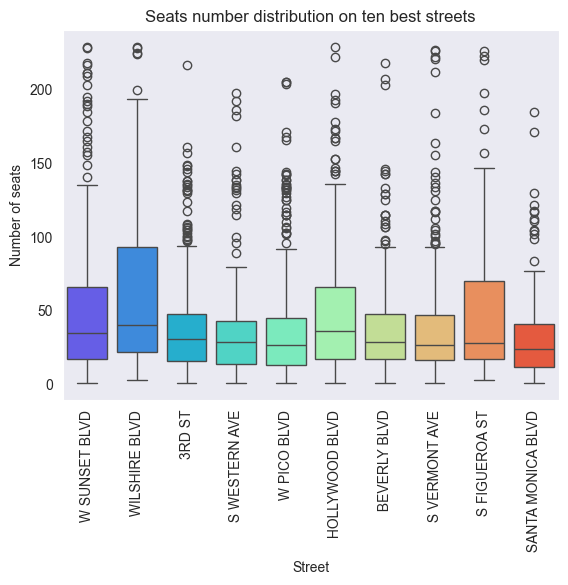

In [69]:
sns.boxplot(x="street", y="number", data=df_rest.query('street in @ten_best_street.street'), palette='rainbow', hue='street', legend=False)
plt.title('Seats number distribution on ten best streets')
plt.xlabel('Street')
plt.xticks(rotation=90)
plt.ylabel('Number of seats')
sns.set_style('dark')

In [70]:
df_rest.query('street in @ten_best_street.street').groupby('street').agg({'number':'median'})

,number
street,
3RD ST,31.0
BEVERLY BLVD,29.0
HOLLYWOOD BLVD,36.0
S FIGUEROA ST,28.0
S VERMONT AVE,27.0
S WESTERN AVE,29.0
SANTA MONICA BLVD,24.0
W PICO BLVD,27.0
W SUNSET BLVD,35.0


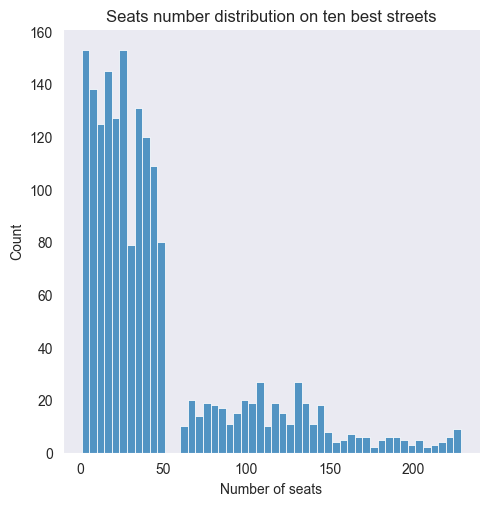

In [71]:
sns.displot(df_rest.query('street in @ten_best_street.street')['number'], bins=50)
plt.title('Seats number distribution on ten best streets')
plt.xlabel('Number of seats')
plt.ylabel('Count')
sns.set_style('dark')

In [72]:
df_rest.query('street == " W PICO BLVD"')['number'].describe()

count    288.000000
mean      40.878472
std       41.772352
min        1.000000
25%       13.000000
50%       27.000000
75%       45.000000
max      205.000000
Name: number, dtype: float64

Conclusiones para los establecimientos localizados en las 10 mejores calles:  
* Se observa que en el 75% de los casos, los establecimientos poseen menos de 100 asientos.  
* Se observa que en el 50% de los casos, los establecimientos poseen entre 20 y 40 asientos.  

Para la Calle Pico Blvd:
* El 75% posee entre 13 y 45 asientos.  
* El 50% posee menos de 27 asientos.

### 2.10 Conclusiones y recomendaciones

El proyecto concebido consiste en abrir un establecimiento de café regentado por robots, por lo que, para analizar su rentabilidad, se debe considerar que el costo de inversión es elevado por el valor de adquisición del equipamiento de robots. Esto conduce a la necesidad de reducir al mínimo posible la cantidad de robots necesarios, lo cual conlleva a limitar la cantidad de mesas/asientos a instalar.  
Esto implica también que, al tener que limitar la cantidad de asientos, es necesario colocar el establecimiento en una zona donde el movimiento de clientes sea grande, a fin de maximizar los ingresos.  

Por consiguiente, se recomienda:  
* Instalar el establecimiento en una de las 10 calles principales, en especial sobre calle "PICO BLVD", ya que es la segunda más utilizada para restaurantes, pero tiene menor cantidad de locales del tipo "café" que la calle "SUNSET BLVD" (la que posee más establecimientos), por lo que la competencia será menor.  
* Colocar una cantidad de asientos cercana a 25, que es una cantidad utilizada en cafeterías, y en los establecimientos en general de la calle recomendada.  
* Se observa que hay un mayor porcentaje de cafeterías que pertenecen a una cadena, por lo que sería recomendable evaluar la posibilidad de entrar en alguna cadena de café.

## 3. Presentación

Ir al siguiente link para visualizar la presentación del análisis:  

Presentation: <(https://drive.google.com/file/d/1vPOpazhqDjX1JIZtX0Ux86HhrCqQFPGn/view?usp=sharing)>